<a href="https://colab.research.google.com/github/shivabioinformatics/AI-ML-in-Space-Biology-NASA-TOPS-T-ScienceCore-/blob/main/module1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Module 1**

 ---
  In this notebook, we will be exploring [phenotypic](https://www.genome.gov/genetics-glossary/Phenotype) data that were collected during the NASA [Rodent Research 9 mission (RR9)](https://www.nasa.gov/ames/space-biosciences/rodent-research-9-spacex-12/). The goal of this scientific mission to the International Space Station was to study the effects of spaceflight on the eye and vision by collecting data on rodents flown in space. We will be using data from the following [NASA Open Science Data Repository](https://osdr.nasa.gov/bio/) RR9 datasets:
1. [OSD-557](https://osdr.nasa.gov/bio/repo/data/studies/OSD-557) contains measurements from 10 male mice that were flown on board the International Space Station during the RR9 mission for 35 days. This dataset also contains data from two sets of control mice. The 10 "Ground Control" mice were housed on the ground for the duration of the flight in cages that replicate the spaceflight cages; while the 10 "Vivarium Control" mice were housed on the ground in the standard mouse vivarium cages to control for variability in housing. The eyes from each mouse were collected for analysis after return to Earth and euthanasia.

2. [OSD-568](https://osdr.nasa.gov/bio/repo/data/studies/OSD-568) contains 3 different assays of microscopy imaging data: one for ZO, one PECAM, and one for TUNEL assays.  We will examine PECAM and TUNEL, each of which are described below.

  [Terminal deoxynucleotidyl transferase dUTP nick end labeling](https://en.wikipedia.org/wiki/TUNEL_assay) (TUNEL) is an assay that that detects [apoptotic](https://en.wikipedia.org/wiki/Apoptosis) cells undergoing extensive DNA degredation.  
[Platelet endothelial cell adhesion molecule](https://en.wikipedia.org/wiki/CD31) (PECAM) is a protein that functions as an adhesive stress-response to both maintain cell junctional integrity and speed restoration of [vascular permeability](https://en.wikipedia.org/wiki/Vascular_permeability).
3. [OSD-583](https://osdr.nasa.gov/bio/repo/data/studies/OSD-583) provides measurements for [intra-ocular pressure](https://en.wikipedia.org/wiki/Intraocular_pressure) (IOP). Repeated intraocular pressure (IOP) measurements were performed before the flight launch and re-measured before the mice were euthanized after splashdown. Measurements of IOP using the rebound tonometer appeared to be well tolerated by the mice. The animals exhibited no signs of irritation or discomfort during the procedure. Sequential measurements were made to obtain an average of the counts as a single IOP readout for each mouse. This process was repeated three times for each eye.




---



These phenotypic datasets include data from several biological measurements including microcomputed tomography (OSD-557), immunostaining microscopy (OSD-568), and tonometry (OSD-583). All measurements were collected on both ground control and spaceflight rodent samples and converted to tabular format to enable data accessibility.

## **Sample types**
There are 3 types of samples that we will encounter in the RR9 datasets: spaceflight, ground control, and cohort control.  

Here we are reading in methods from the methods.ipynb notebook that you copied into your Google Drive. You will be prompted to allow this notebook access to your Google Drive in order to read in the methods. Make sure to respond to all the prompts. The code in this cell may take a few minutes to run, so be patient.

Install and import the import_ipynb module enabling the import of methods from remote notebooks, mount your google drive to this notebook, and import the methods from the methods.ipynb notebook

In [2]:
%%capture
!pip install import_ipynb
import import_ipynb
from google.colab import drive
drive.flush_and_unmount()
drive.mount("mnt")
m = __import__("mnt/MyDrive/Colab Notebooks/Copy of methods")

# OSD-557 microCT Datasets

Here names with .1 = axial view, and without .1 = sagital view

In [3]:

import pandas as pd
import import_ipynb
from google.colab import drive

# Install and import the import_ipynb module enabling the import of methods from remote notebooks, mount your google drive to this notebook, and import the methods from the methods.ipynb notebook
!pip install import_ipynb
drive.flush_and_unmount()
drive.mount("mnt")
m = __import__("mnt/MyDrive/Colab Notebooks/Copy of methods")

#From Method File defining read_phynotype_data
def read_phenotype_data(dataset, data):
  url='https://osdr.nasa.gov//geode-py/ws/studies/OSD-' + str(dataset) + '/download?source=datamanager&file=' + data + '.csv'
  df = pd.read_csv(url)
  return df

data=dict()
data['microCT'] = m.read_phenotype_data('557', 'LSDS-1_microCT_MicroCT_Transformed_Reusable_Results')
print('num records: ', len(data['microCT']))
print('treatments: ', set(data['microCT']['Treatment']))
data['microCT'].head()


Mounted at mnt
num records:  12
treatments:  {'Vivarium', 'Flight', 'Ground Control'}


,Source Name,Sample Name,Treatment,Ant-Post,Sup-Inf,Retina,Pigment Layer,Choroid,Sclera,Ant-Post.1,Right-left,Retina.1,Pigment Layer.1,Choroid.1,Sclera.1
0,F10,F10_Mouse_Eye,Flight,1.765000,2.044000,0.077,0.038,0.041000,0.059000,1.748000,1.997000,0.144000,0.051000,0.041000,0.073000
1,F12,F12_Mouse_Eye,Flight,1.724000,2.028000,0.091,0.048,0.036000,0.054000,1.720000,1.980000,0.087000,0.041000,0.039000,0.057000
2,F13,F13_Mouse_Eye,Flight,1.754333,2.043667,0.089,0.044,0.036333,0.054333,1.750333,1.969667,0.113667,0.053667,0.038333,0.065333
3,F14,F14_Mouse_Eye,Flight,1.774000,2.059000,0.099,0.046,0.032000,0.050000,1.783000,1.932000,0.110000,0.069000,0.035000,0.066000
4,V10,V10_Mouse_Eye,Vivarium,1.771000,2.119000,0.145,0.076,0.083000,0.109000,1.755000,2.089000,0.118000,0.055000,0.061000,0.067000


Exploring Ant-Post field of the micro CT data for ground and spaceflight samples using **Box Plot** and **Whisker Plos**.

```
# This is formatted as code
```



In [7]:
# Reading all the available fields
print(data['microCT'].columns)


Index(['Source Name', 'Sample Name', 'Treatment', 'Ant-Post', 'Sup-Inf',
       'Retina', 'Pigment Layer', 'Choroid', 'Sclera', 'Ant-Post.1',
       'Right-left', 'Retina.1', 'Pigment Layer.1', 'Choroid.1', 'Sclera.1'],
      dtype='object')


In [8]:
fields_of_interest = ['Ant-Post', 'Ant-Post.1']
df_selected = data['microCT'][fields_of_interest]
print(df_selected.head())


   Ant-Post  Ant-Post.1
0  1.765000    1.748000
1  1.724000    1.720000
2  1.754333    1.750333
3  1.774000    1.783000
4  1.771000    1.755000


## Anterior-Posterior

field:  Ant-Post
excluding samples:  []
{'Ant-Post': {'t-test p-value': 0.14175}}
n flight =  4
n nonflight =  8


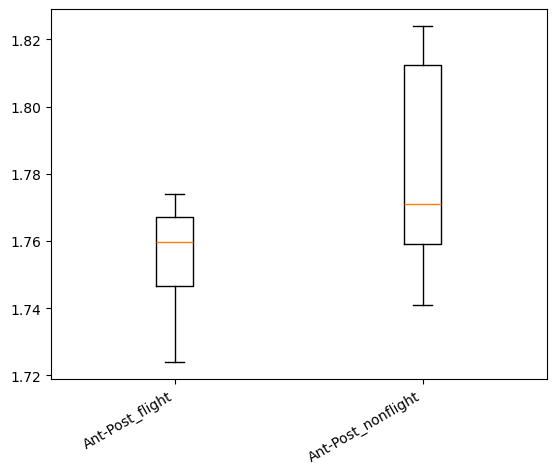

field:  Ant-Post.1
excluding samples:  []
{'Ant-Post.1': {'t-test p-value': 0.49605}}
n flight =  4
n nonflight =  8


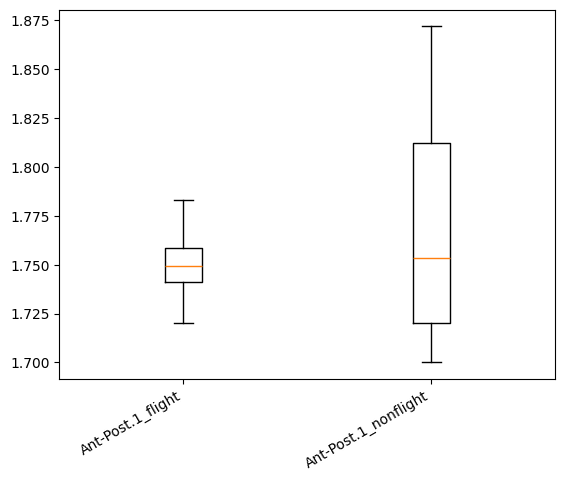

In [9]:
def plotbox_and_stats(data_, sample_key, field, treatment, space, exclude_samples=[]):
  print('field: ', field)
  print('excluding samples: ', exclude_samples)
  fieldValues = set(data_[field])
  value_dict=dict()
  results = dict()

  flight = str(field) + '_flight'
  nonflight= str(field) + '_nonflight'
  results[field] = dict()
  value_dict[flight] = list()
  value_dict[nonflight] = list()
  for i in range(len(data_)):
    if data_.iloc[i][sample_key] in exclude_samples:
      continue
    elif treatment is None:
      if data_.iloc[i][sample_key].startswith('F'):
        value_dict[flight].append(data_.iloc[i][field])
      else:
        value_dict[nonflight].append(data_.iloc[i][field])
    else:
      if data_.iloc[i][treatment] == space:
        value_dict[flight].append(data_.iloc[i][field])
      else:
        value_dict[nonflight].append(data_.iloc[i][field])


  if len(value_dict[flight]) != 0 and len(value_dict[nonflight]) != 0:
    results[field]['t-test p-value'] = float('%.5f' % (stats.ttest_ind(value_dict[flight], value_dict[nonflight], equal_var=False).pvalue))
    #results[field]['wilcoxon p-value'] = float('%.5f' % (stats.ranksums(value_dict[flight], value_dict[nonflight]).pvalue))
    #results[field]['ks-test p-value'] = float('%.5f' % (stats.kstest(value_dict[flight], value_dict[nonflight]).pvalue))


  print(results)
  print('n flight = ', len(value_dict[flight]))
  print('n nonflight = ', len(value_dict[nonflight]))
  fig,ax = plt.subplots()
  ax.boxplot(value_dict.values())
  ax.set_xticklabels(value_dict.keys())
  #plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
  plt.xticks(rotation=30, ha='right')



  plt.show()


m.plotbox_and_stats(data_=data['microCT'], sample_key = 'Source Name', field='Ant-Post', treatment='Treatment', space='Flight', exclude_samples=[])
m.plotbox_and_stats(data_=data['microCT'], sample_key = 'Source Name', field='Ant-Post.1', treatment='Treatment', space='Flight', exclude_samples=[])


Exploring **Superior-Inferior Measurement** field of the micro CT data for ground and spaceflight samples using **Box Plot** and **Whisker Plos**.


## Superior-Inferior Measurement

field:  Sup-Inf
excluding samples:  []
{'Sup-Inf': {'t-test p-value': 0.52282}}
n flight =  4
n nonflight =  8


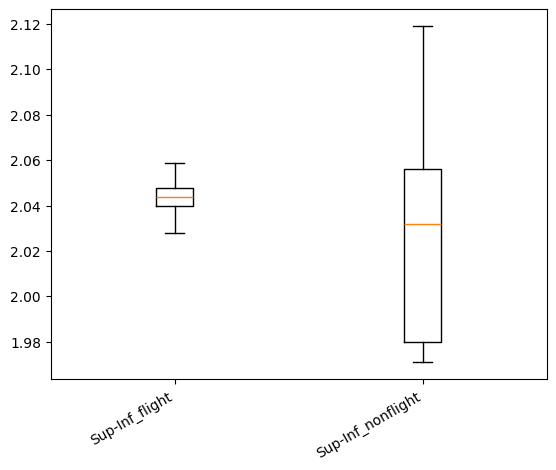

In [10]:
m.plotbox_and_stats(data_=data['microCT'], sample_key = 'Source Name', field='Sup-Inf', treatment='Treatment', space='Flight', exclude_samples=[])

## Retina Measurement

field:  Retina
excluding samples:  []
{'Retina': {'t-test p-value': 0.00796}}
n flight =  4
n nonflight =  8


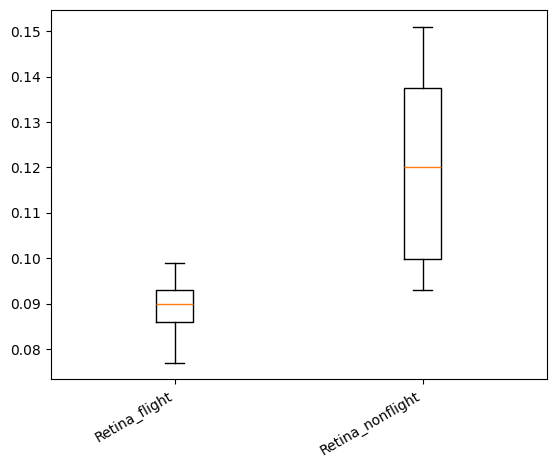

field:  Retina.1
excluding samples:  []
{'Retina.1': {'t-test p-value': 0.82328}}
n flight =  4
n nonflight =  8


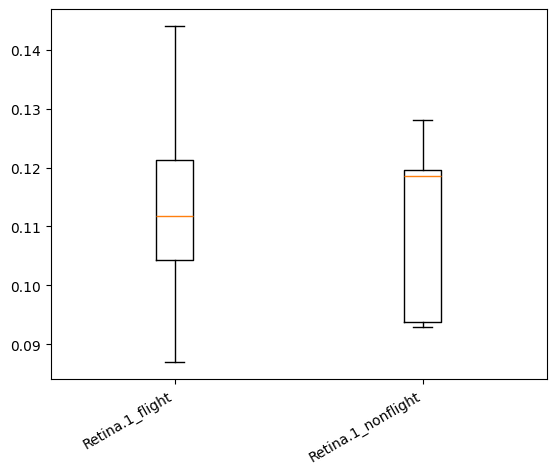

In [11]:
m.plotbox_and_stats(data_=data['microCT'],  sample_key = 'Source Name', field='Retina', treatment='Treatment', space='Flight', exclude_samples=[])
m.plotbox_and_stats(data_=data['microCT'],  sample_key = 'Source Name', field='Retina.1', treatment='Treatment', space='Flight', exclude_samples=[])

## Pigment layer Measurement

field:  Pigment Layer
excluding samples:  []
{'Pigment Layer': {'t-test p-value': 0.01535}}
n flight =  4
n nonflight =  8


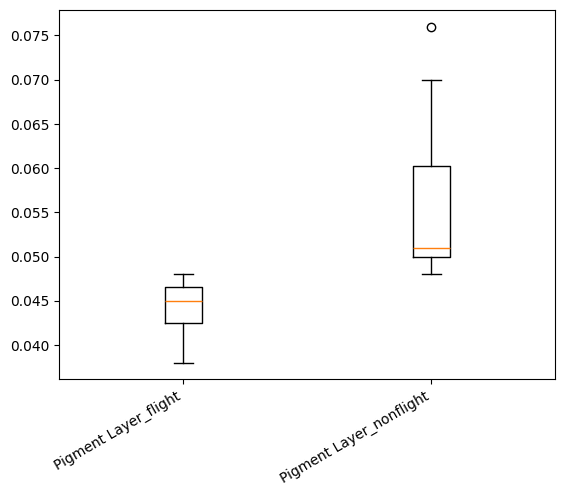

field:  Pigment Layer.1
excluding samples:  []
{'Pigment Layer.1': {'t-test p-value': 0.98999}}
n flight =  4
n nonflight =  8


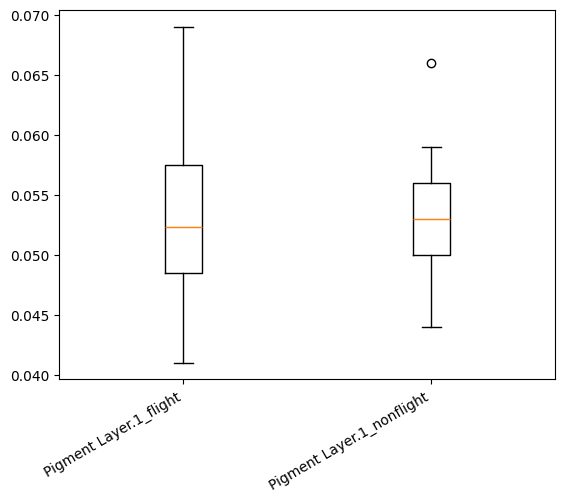

In [ ]:
m.plotbox_and_stats(data_=data['microCT'], sample_key = 'Source Name', field='Pigment Layer', treatment='Treatment', space='Flight', exclude_samples=[])
m.plotbox_and_stats(data_=data['microCT'], sample_key = 'Source Name', field='Pigment Layer.1', treatment='Treatment', space='Flight', exclude_samples=[])

## Choroid Measurement

field:  Choroid
excluding samples:  []
{'Choroid': {'t-test p-value': 0.01249}}
n flight =  4
n nonflight =  8


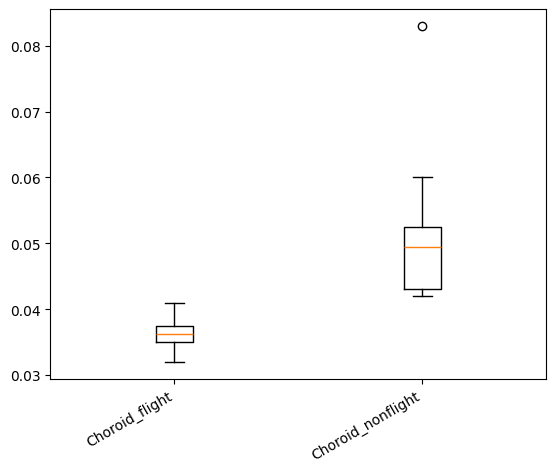

field:  Choroid.1
excluding samples:  []
{'Choroid.1': {'t-test p-value': 0.00862}}
n flight =  4
n nonflight =  8


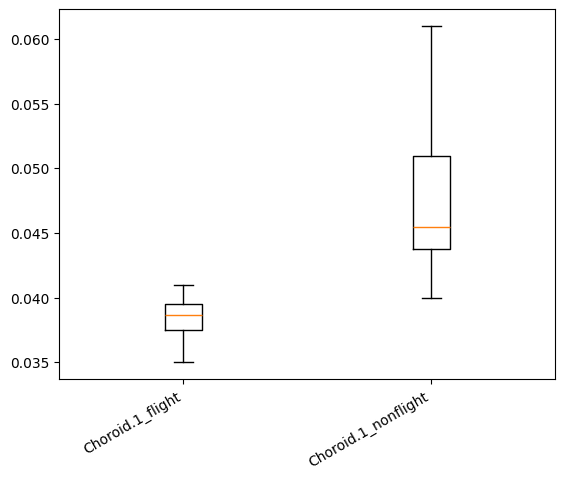

In [ ]:
m.plotbox_and_stats(data_=data['microCT'], sample_key = 'Source Name', field='Choroid', treatment='Treatment', space='Flight', exclude_samples=[])
m.plotbox_and_stats(data_=data['microCT'], sample_key = 'Source Name', field='Choroid.1', treatment='Treatment', space='Flight', exclude_samples=[])

## Sclera Measurement

field:  Sclera
excluding samples:  []
{'Sclera': {'t-test p-value': 0.0026}}
n flight =  4
n nonflight =  8


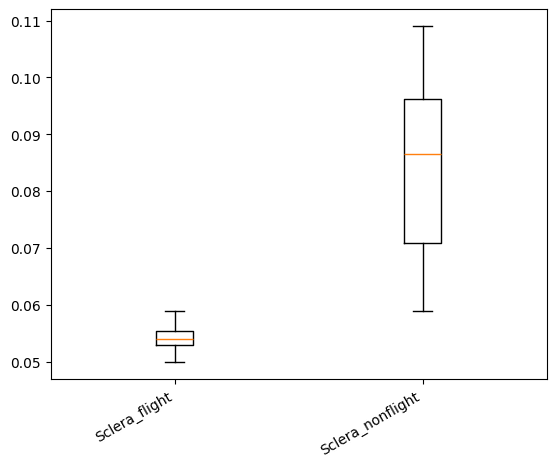

field:  Sclera.1
excluding samples:  []
{'Sclera.1': {'t-test p-value': 0.18301}}
n flight =  4
n nonflight =  8


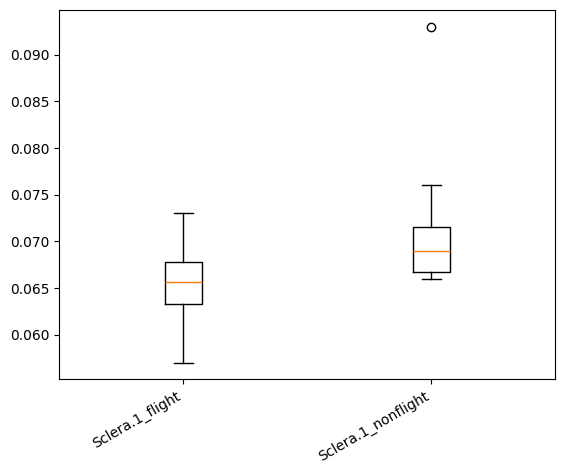

In [ ]:
m.plotbox_and_stats(data_=data['microCT'], sample_key = 'Source Name', field='Sclera', treatment='Treatment', space='Flight', exclude_samples=[])
m.plotbox_and_stats(data_=data['microCT'], sample_key = 'Source Name', field='Sclera.1', treatment='Treatment', space='Flight', exclude_samples=[])

**QUESTIONS**


1. Which measurements had a statistically significant difference in distribution between flight and ground samples for all 3 tests?

Based on the p-value, the Retine, Choroid and Sclera measurement had sttistically significant.  


2. Based on the statistical tests we did on the microCT data, which measurement seems to have the most prominent distinction between space flight and ground samples?
2. Based on the statistical tests we did on the microCT data, which measurement seems to have the most prominent distinction between space flight and ground samples? Sclera measurement since it was the lowest p-valaue among all, meanining probably the most statistically signficant measurment between fligth and none-flight
3. What are reasons to include or exclude samples from the Vivarium treatment?

# OSD-557 Immunostaining Microscopy Datasets

HNE or hydroxynonenal is a colorless oil that is produced by lipid oxidation. It is found in animal tissues in higher quantities during oxidative stress. It is considered a possible causal agent of numerous diseases including chronic inflammation, neurodegenerative disorders, and cancer. Spaceflight causes photoreceptor degradation and oxidative stress. Immunofluorescence staining for HNE marker is red.

For each section on the retina slide, they selected 5 areas for counting.  These 5 areas were used subsequently in their quantitative analysis.

`sumcount`: total HNE positive cells in these five regions.

`sumEC`: total HNE positive endothelial cells in the same five regions.

`sunarea`: total areas for these five regions.

`dentotal`: HNE positive cell density.

`denEC`: HNE positive Endothelial cell density.

Read in the HNE data


In [ ]:
data['immunoHNE'] = m.read_phenotype_data('557', 'LSDS-1_immunostaining_microscopy_HNEtr_Transformed_Reusable_Results')
print('num records: ', len(data['immunoHNE']))
print('sample names: ', list(data['immunoHNE']['Sample Name']))
data['immunoHNE'].head()

num records:  23
sample names:  ['F15_Mouse_Eye', 'F16_Mouse_Eye', 'F17_Mouse_Eye', 'F18_Mouse_Eye', 'F19_Mouse_Eye', 'F20_Mouse_Eye', 'GC15_Mouse_Eye', 'GC16_Mouse_Eye', 'GC17_Mouse_Eye', 'GC18_Mouse_Eye', 'GC19_Mouse_Eye', 'Viv15_Mouse_Eye', 'Viv16_Mouse_Eye', 'Viv17_Mouse_Eye', 'Viv18_Mouse_Eye', 'Viv19_Mouse_Eye', 'Viv20_Mouse_Eye', 'CC2_15_Mouse_Eye', 'CC2_16_Mouse_Eye', 'CC2_17_Mouse_Eye', 'CC2_18_Mouse_Eye', 'CC2_19_Mouse_Eye', 'CC2_20_Mouse_Eye']


,Source Name,Sample Name,sumcount,sumEC,sunarea,dentotal,denEC
0,F15,F15_Mouse_Eye,124,24,1.149408,107.881593,20.880308
1,F16,F16_Mouse_Eye,97,28,0.946872,102.442566,29.571050
2,F17,F17_Mouse_Eye,159,28,0.875718,181.565290,31.973762
3,F18,F18_Mouse_Eye,90,23,0.650403,138.375660,35.362669
4,F19,F19_Mouse_Eye,106,15,1.086317,97.577417,13.808125


*We will examine differences between the ground and spaceflight samples for the distribution of data in the sumcount, sumeEC, sunarea, dentotal, and denEC columns.*

Plot a box plot for the sumcount field of the immuno HNE data for ground and spaceflight samples


field:  sumcount
excluding samples:  []
{'sumcount': {'t-test p-value': 0.00523}}
n flight =  6
n nonflight =  17


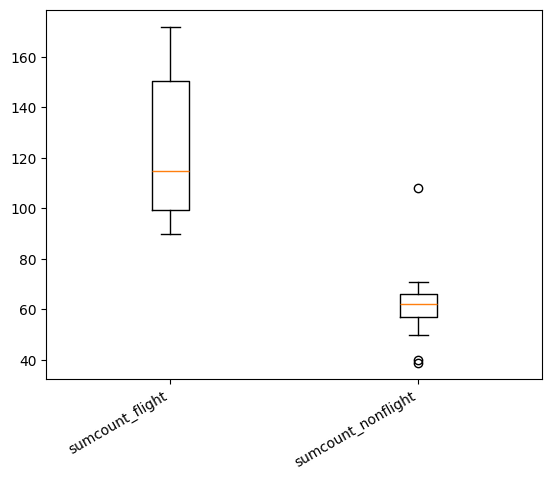

field:  dentotal
excluding samples:  []
{'dentotal': {'t-test p-value': 0.00218}}
n flight =  6
n nonflight =  17


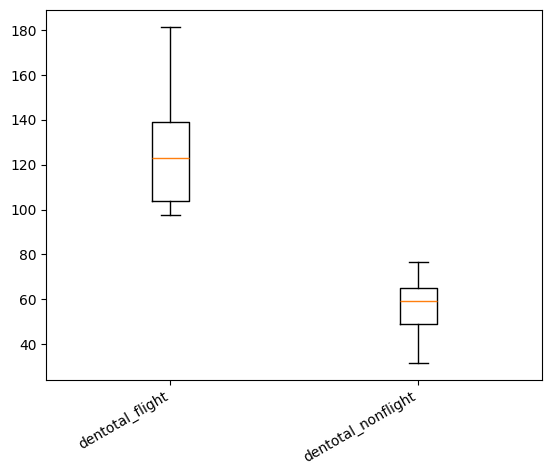

field:  denEC
excluding samples:  []
{'denEC': {'t-test p-value': 0.0262}}
n flight =  6
n nonflight =  17


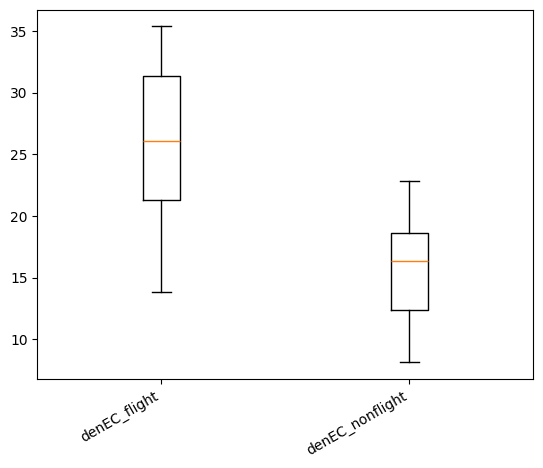

In [ ]:
m.plotbox_and_stats(data_=data['immunoHNE'], sample_key = 'Source Name', field='sumcount', treatment=None, space=None, exclude_samples=[])

m.plotbox_and_stats(data_=data['immunoHNE'], sample_key = 'Source Name', field='dentotal', treatment=None, space=None, exclude_samples=[])

m.plotbox_and_stats(data_=data['immunoHNE'], sample_key = 'Source Name', field='denEC', treatment=None, space=None, exclude_samples=[])

**QUESTIONS**

1. How many flight samples and non-flight samples are in this dataset?
n flight =  6
n nonflight =  17

2. Which metric has the lowest p-values?
dentotal
3. What does high HNE total density infer about the state of a cell?
HNE lipid secretion,which is found animal issues during oxidative stress and can be indicating underlyign conditions such as chronic inflamation, cancer and neurodegenerative disorders.


Explore the immunostaining microscopy PNA data
What is immunostaining PNA?

Peanut agglutinin (PNA) is plant lectin protein derived from the fruits of Arachis hypogaea. Lectins recognise and bind particular sugar sequences in carbohydrates. The name "peanut agglutinin" originates from its ability to stick together (agglutinate) cells. In the context of this experiment, PNA is a specific marker for cone photoreceptors and can be used to detect signs of degradation.

https://www.mdpi.com/1422-0067/24/8/7362

In [ ]:
data['immunoPNA'] = m.read_phenotype_data('557', 'LSDS-1_immunostaining_microscopy_PNAtr_Transformed_Reusable_Results')

In [ ]:
print('num records: ', len(data['immunoPNA']))

num records:  10


In [ ]:
print(data['immunoPNA'].columns)

Index(['Source Name', 'Sample Name', 'Treatment', 'totct', 'totarea',
       'density', 'Average HNE Fluorescent Intensity'],
      dtype='object')


In [ ]:
print('sample names:', list(data['immunoPNA']['Sample Name']))

sample names: ['F15_Mouse_Eye', 'F17_Mouse_Eye', 'F18_Mouse_Eye', 'F19_Mouse_Eye', 'F20_Mouse_Eye', 'GC15_Mouse_Eye', 'GC16_Mouse_Eye', 'GC17_Mouse_Eye', 'GC18_Mouse_Eye', 'GC19_Mouse_Eye']


In [ ]:
data['immunoPNA'].head()

,Source Name,Sample Name,Treatment,totct,totarea,density,Average HNE Fluorescent Intensity
0,F15,F15_Mouse_Eye,Flight,201,0.222335,904.041554,37.552000
1,F17,F17_Mouse_Eye,Flight,260,0.316144,822.409317,48.436333
2,F18,F18_Mouse_Eye,Flight,241,0.205566,1172.370234,34.360333
3,F19,F19_Mouse_Eye,Flight,259,0.286833,902.965714,39.644667
4,F20,F20_Mouse_Eye,Flight,209,0.256673,814.266522,41.274333


field:  totarea
excluding samples:  []
{'totarea': {'t-test p-value': 0.88465}}
n flight =  5
n nonflight =  5


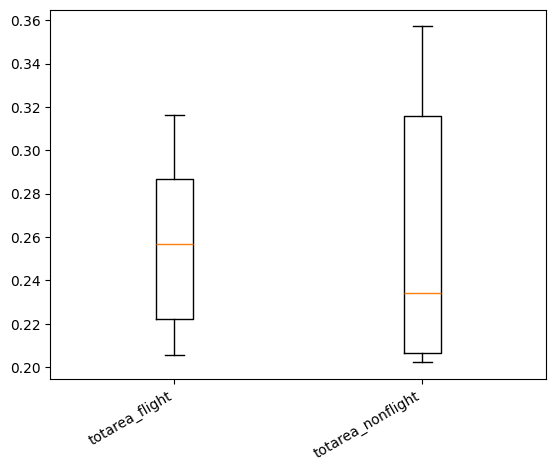

In [ ]:
m.plotbox_and_stats(data_=data['immunoPNA'], sample_key = 'Source Name', field='totarea', treatment='Treatment', space='Flight', exclude_samples=[])

field:  density
excluding samples:  []
{'density': {'t-test p-value': 0.01739}}
n flight =  5
n nonflight =  5


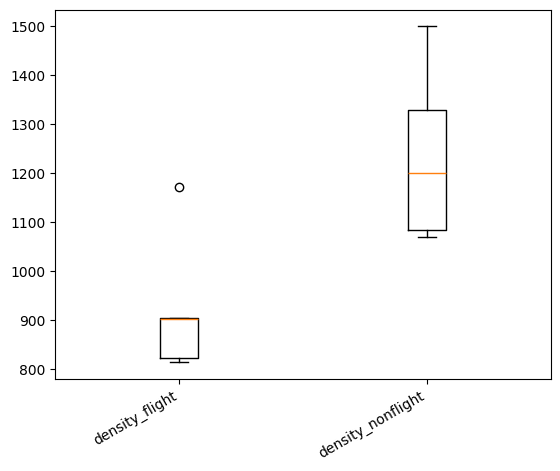

In [ ]:
m.plotbox_and_stats(data_=data['immunoPNA'], sample_key = 'Source Name', field='density', treatment='Treatment', space='Flight', exclude_samples=[])

field:  Average HNE Fluorescent Intensity
excluding samples:  []
{'Average HNE Fluorescent Intensity': {'t-test p-value': 0.04793}}
n flight =  5
n nonflight =  5


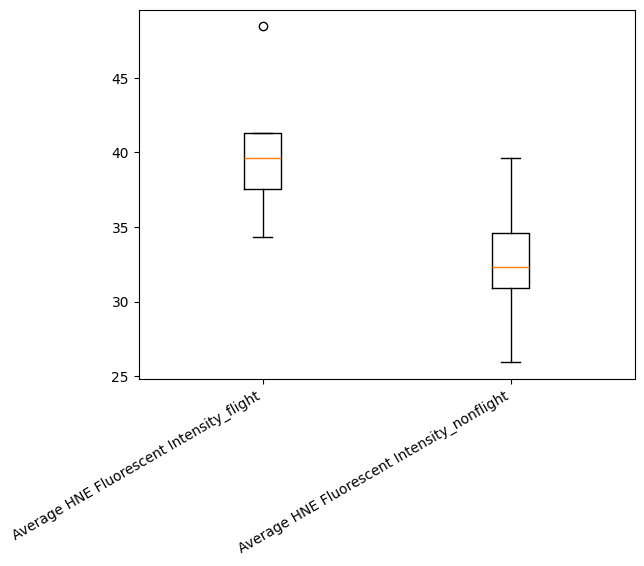

In [ ]:
m.plotbox_and_stats(data_=data['immunoPNA'], sample_key = 'Source Name', field='Average HNE Fluorescent Intensity', treatment='Treatment', space='Flight', exclude_samples=[])

Here the way the density has been measured is by totct/totarea which gives the density. The HNE Fluorescent Intensity has been calculated by diving total floursent intensity by total area of Fluorescent region.

# OSD-568 Datasets

## Explore the TUNEL microscopy data


In [12]:
data['immunoMICRO-TUNEL'] = m.read_phenotype_data('568', 'LSDS-5_immunostaining_microscopy_TUNELtr_TRANSFORMED')
print('number of samples: ', len(list(data['immunoMICRO-TUNEL']['Sample_Name'])))
print('samples: ', list(data['immunoMICRO-TUNEL']['Sample_Name']))
data['immunoMICRO-TUNEL'].head()

#Plot



number of samples:  23
samples:  ['F15_Mouse_Eye', 'F16_Mouse_Eye', 'F17_Mouse_Eye', 'F18_Mouse_Eye', 'F19_Mouse_Eye', 'F20_Mouse_Eye', 'GC15_Mouse_Eye', 'GC16_Mouse_Eye', 'GC17_Mouse_Eye', 'GC18_Mouse_Eye', 'GC19_Mouse_Eye', 'GC20_Mouse_Eye', 'VG15_Mouse_Eye', 'VG16_Mouse_Eye', 'VG17_Mouse_Eye', 'VG18_Mouse_Eye', 'VG20_Mouse_Eye', 'V15_Mouse_Eye', 'V16_Mouse_Eye', 'V17_Mouse_Eye', 'V18_Mouse_Eye', 'V19_Mouse_Eye', 'V20_Mouse_Eye']


,Sample_Name,Total,Total_EC,Total_Area,Density,Density_EC
0,F15_Mouse_Eye,193,76,1.127330,171.200986,67.415932
1,F16_Mouse_Eye,174,70,1.054249,165.046336,66.397951
2,F17_Mouse_Eye,170,61,1.074499,158.213281,56.770648
3,F18_Mouse_Eye,166,39,1.173785,141.422795,33.225837
4,F19_Mouse_Eye,151,32,1.051339,143.626361,30.437374


field:  Density_EC
excluding samples:  []
{'Density_EC': {'t-test p-value': 0.01726}}
n flight =  6
n nonflight =  17


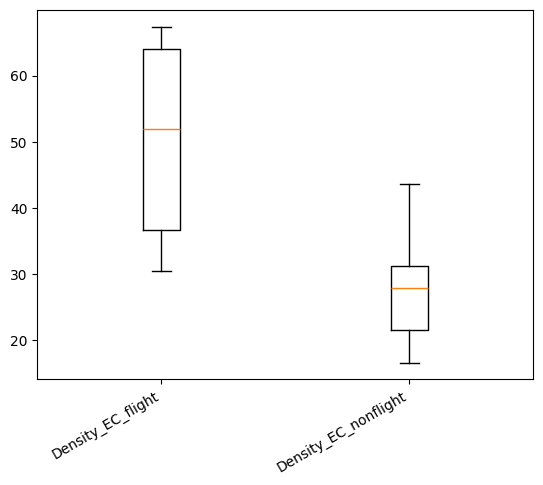

In [13]:
m.plotbox_and_stats(data_=data['immunoMICRO-TUNEL'], sample_key = 'Sample_Name', field='Density_EC', treatment=None, space=None, exclude_samples=[])

## Explore the PECAM data


In [14]:
data['immunoMICRO-PECAM'] = m.read_phenotype_data('568', 'LSDS-5_immunostaining_microscopy_PECAMtr_TRANSFORMED')
print('number of samples: ', len(list(data['immunoMICRO-PECAM']['Sample_Name'])))
print('samples: ', list(data['immunoMICRO-PECAM']['Sample_Name']))
data['immunoMICRO-PECAM'].head()

number of samples:  11
samples:  ['F15_Mouse_Eye', 'F16_Mouse_Eye', 'F17_Mouse_Eye', 'F18_Mouse_Eye', 'F19_Mouse_Eye', 'F20_Mouse_Eye', 'GC15_Mouse_Eye', 'GC16_Mouse_Eye', 'GC17_Mouse_Eye', 'GC18_Mouse_Eye', 'GC19_Mouse_Eye']


,Sample_Name,Average
0,F15_Mouse_Eye,45.0098
1,F16_Mouse_Eye,53.9888
2,F17_Mouse_Eye,37.0548
3,F18_Mouse_Eye,67.0988
4,F19_Mouse_Eye,49.7456


field:  Average
excluding samples:  []
{'Average': {'t-test p-value': 0.02146}}
n flight =  6
n nonflight =  5


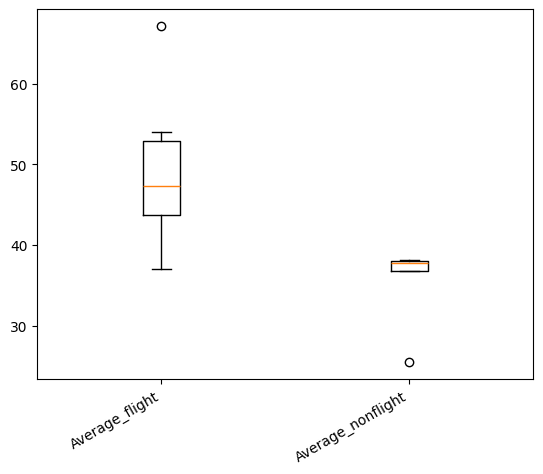

In [15]:
m.plotbox_and_stats(data_=data['immunoMICRO-PECAM'], sample_key = 'Sample_Name', field='Average', treatment=None, space=None, exclude_samples=[])

# OSD-583 Data Exploration

Read in tonometry transformed data


In [16]:
data['iop'] = m.read_phenotype_data('583', 'LSDS-16_tonometry_maoTRANSFORMED')
print('num samples: ', str(len(list(data['iop']['Sample Name']))))
print('samples: ', list(data['iop']['Sample Name']))
data['iop'].head()

num samples:  100
samples:  ['F1_Mouse_Eye', 'F2_Mouse_Eye', 'F3_Mouse_Eye', 'F4_Mouse_Eye', 'F5_Mouse_Eye', 'F6_Mouse_Eye', 'F7_Mouse_Eye', 'F8_Mouse_Eye', 'F9_Mouse_Eye', 'F10_Mouse_Eye', 'F11_Mouse_Eye', 'F12_Mouse_Eye', 'F13_Mouse_Eye', 'F14_Mouse_Eye', 'F15_Mouse_Eye', 'F16_Mouse_Eye', 'F17_Mouse_Eye', 'F18_Mouse_Eye', 'F19_Mouse_Eye', 'F20_Mouse_Eye', 'FViv1_CC1_Mouse_Eye', 'FViv2_CC1_Mouse_Eye', 'FViv3_CC1_Mouse_Eye', 'FViv4_CC1_Mouse_Eye', 'FViv5_CC1_Mouse_Eye', 'FViv6_CC1_Mouse_Eye', 'FViv7_CC1_Mouse_Eye', 'FViv8_CC1_Mouse_Eye', 'FViv9_CC1_Mouse_Eye', 'FViv10_CC1_Mouse_Eye', 'FViv11_CC1_Mouse_Eye', 'FViv12_CC1_Mouse_Eye', 'FViv13_CC1_Mouse_Eye', 'FViv14_CC1_Mouse_Eye', 'FViv15_CC1_Mouse_Eye', 'FViv16_CC1_Mouse_Eye', 'FViv17_CC1_Mouse_Eye', 'FViv18_CC1_Mouse_Eye', 'FViv19_CC1_Mouse_Eye', 'FViv20_CC1_Mouse_Eye', 'GC1_Mouse_Eye', 'GC2_Mouse_Eye', 'GC3_Mouse_Eye', 'GC4_Mouse_Eye', 'GC5_Mouse_Eye', 'GC6_Mouse_Eye', 'GC7_Mouse_Eye', 'GC8_Mouse_Eye', 'GC9_Mouse_Eye', 'GC10_Mouse_Eye'

,Source Name,Sample Name,Factor Value: Spaceflight,Left_1,Left_2,Left_3,Avg_Left,Right_1,Right_2,Right_3,Avg_Right,time_Start,Time_End
0,F1,F1_Mouse_Eye,Space Flight,19,16,18,17.666667,18,18,15,17.000000,2:46,2:48
1,F2,F2_Mouse_Eye,Space Flight,17,16,16,16.333333,16,16,15,15.666667,2:55,2:58
2,F3,F3_Mouse_Eye,Space Flight,16,18,15,16.333333,17,19,17,17.666667,2:32,2:34
3,F4,F4_Mouse_Eye,Space Flight,18,15,16,16.333333,18,16,15,16.333333,2:15,2:17
4,F5,F5_Mouse_Eye,Space Flight,18,18,16,17.333333,14,16,14,14.666667,2:20,2:22


We will be measuring the difference in distributions of the Avg_Left and Avg_Right samples measurements between flight and non-flight samples.

## **Explore the Avg_Left tonometry**


field:  Avg_Left
excluding samples:  []
{'Avg_Left': {'t-test p-value': 0.04627}}
n flight =  20
n nonflight =  80


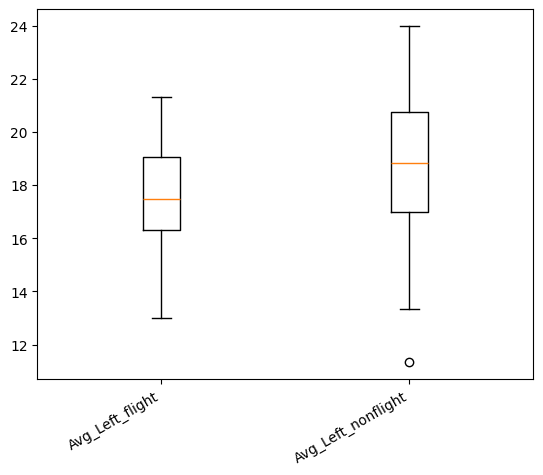

In [17]:
m.plotbox_and_stats(data_=data['iop'], sample_key = 'Source Name', field='Avg_Left', treatment='Factor Value: Spaceflight', space="Space Flight", exclude_samples=[])

## **Explore the Avg_Right tonometry**


field:  Avg_Right
excluding samples:  []
{'Avg_Right': {'t-test p-value': 0.00054}}
n flight =  20
n nonflight =  80


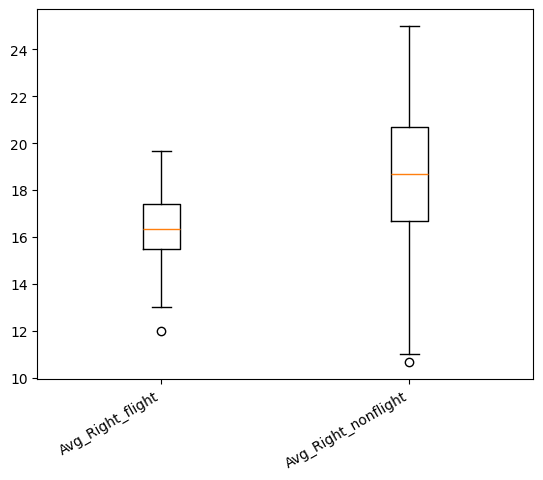

In [18]:
m.plotbox_and_stats(data_=data['iop'], sample_key = 'Source Name', field='Avg_Right', treatment='Factor Value: Spaceflight', space="Space Flight", exclude_samples=[])

End of Module 1. <br>
In this modle, the purpose was to explore the datasets, how the data has been collected, the method and the reasoning behind the experimental set up and the measurment.

In this module we explored 3 different datasets with different method which is understand what spaceflight potentially could affect on eyes. This datasets goal is to understand the effect of microgravity on different biological system.

In this module we used t test to calculate p-values and learn about statistical difference between rodents that were flown into space versus ground control.